## <u>ASSIGNMENT 01: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="3">LA01</td>
    </tr>
</table>

1.(A). Teknik <b>Gray-level Slicing</b> digunakan untuk menyorot specific range dari gray levels dalam gambar tertentu.
<ul>
    <li>Mirip dengan thresholding</li>
    <li>Gray level lain dapat ditekan atau dipertahankan</li>
    <li>Berguna untuk menyorot fitur dalam gambar</li>
</ul>

<b>I. Gray-level slicing tanpa latar belakang</b>

<img src="./1.png" width="300"></img>

Pendekatan pertama <b>menampilkan nilai tinggi untuk semua gray levels di wilayah tertentu gambar dan nilai rendah untuk gray levels di wilayah lain</b> dengan mengabaikan latar belakang.

Gambar diatas menyoroti rentang gray levels [A, B] dengan mengurangi intensitas gray levels yang lain ke tingkat yang konstan.

<b>II. Gray-level slicing dengan latar belakang</b>

<img src="./2.png" width="300"></img>

Gray-level slicing dengan latar belakang: Pendekatan kedua <b>mencerahkan/menggelapkan gray levels di wilayah tertentu gambar tetapi mempertahankan gray levels di wilayah lain agar tidak berubah</b> dengan memperhatikan latar belakang.

Gambar diatas menyoroti rentang gray levels [A, B] dengan tidak mengubah intensitas gray levels lainnya.
<br>
***

1.(B). <b>Contrast</b> adalah <b>perbedaan kecerahan antara area terang (MAX) dan gelap (MIN)</b> dalam sebuah pemandangan. Histogram yang lebar mencerminkan gambar dengan <b>good contrast</b>, sedangkan histogram yang sempit mencerminkan <b>bad contrast</b>.

<img src="./3.png" width="300"></img>

Gambar diatas memiliki <b>bad contrast</b> karena gambar tersebut menghasilkan histogram dengan volume pixel besar di sepanjang rentang tones yang relatif sempit. Dari bentuk cdf-nya, gambar ini dapat diperkirakan memiliki banyak daerah yang terang.

Kita dapat menggunakan <b>Histogram Equalization</b> yang akan meningkatkan kontras gambar.

<b>Histogram Equalization</b> dapat digunakan apabila gambar terlihat buram karena tidak memiliki kontras yang memadai karena background dan foregroundnya sama-sama terang atau gelap. Dalam gambar seperti itu, area terang dan gelap berpadu bersama menciptakan gambar tidak memiliki sorotan dan bayangan. Dalam metode ini, histogram akan diregangkan sesuai dengan fungsi distribusi kumulatifnya. Jadi, <b>Cumulative Distribution Function (CDF)</b> dari gambar setelah proses equalization, idealnya harus berupa <b>garis lurus</b>.
<br>
***

Berikut ini contoh penerapan soal 1.(B).

Saya menggunakan <b>cv2</b> untuk membaca gambar, <b>numpy</b> untuk membuat histogram, serta <b>matplotlib</b> untuk menampilkan gambar.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Saya menggunakan low contrast image yang diubah menjadi grayscale dan disimpan dalam variabel flower_img.

In [2]:
flower_img = cv2.imread('./flower.png', cv2.IMREAD_GRAYSCALE)

Saya menampilkan flower_img dan membuat histogramnya. Saya melihat bahwa gambar ini memiliki kontras yang buruk karena nilai gray level tidak tersebar luas. Hal ini ditunjukkan karena gray levelsnya berkisar antara nilai 100 sampai dengan 240, dan memuncak sekitar nilai 180. Daerah pojok kiri dan pojok kanan histogram juga tampak kosong.

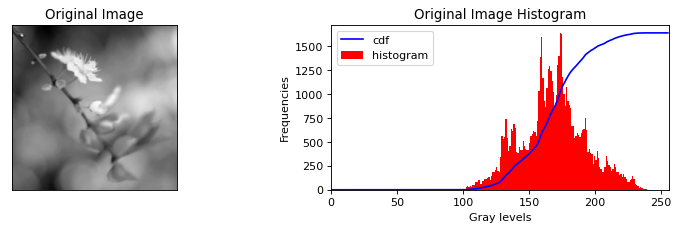

In [3]:
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(flower_img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist, bins = np.histogram(flower_img.flatten(),256,[0,256])
plt.subplot(222)
plt.title('Original Image Histogram')
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(flower_img.flatten(),256,[0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')
plt.show()

Saya menggunakan metode .equalizeHist() untuk menyebarkan nilai gray levels dan menyimpan gambar yang dihasilkan dalam variabel equalized_img.

In [4]:
equalized_img = cv2.equalizeHist(flower_img)

Saya memperlihatkan perbandingan antara original image dan equalized image. Pada original image, objek bunga, daun, dan latar belakangnya sulit untuk dibedakan. Sedangkan, pada equalized image, kontrasnya lebih baik, sehingga bagian-bagian dari gambar dapat dilihat dan diidentifikasi lebih jelas. Equalized histogram membuat daerah tertentu lebih gelap atau lebih terang daripada original image.

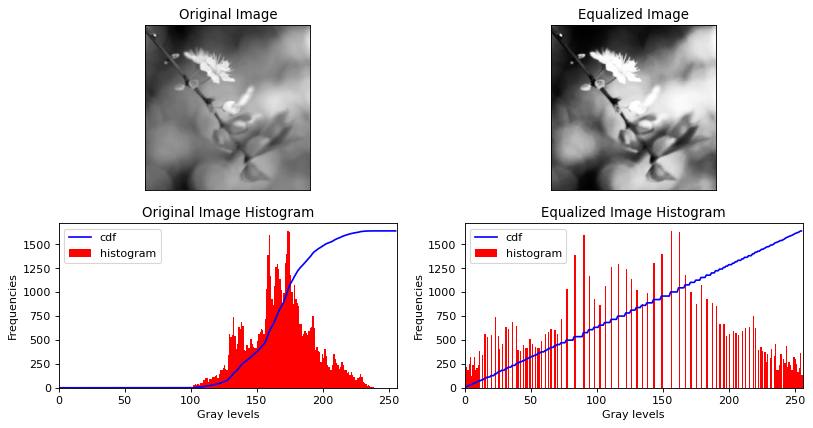

In [5]:
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(flower_img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist, bins = np.histogram(flower_img.flatten(),256,[0,256])
plt.subplot(223)
plt.title('Original Image Histogram')
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(flower_img.flatten(),256,[0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')

plt.subplot(222), plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist, bins = np.histogram(equalized_img.flatten(),256,[0,256])
plt.subplot(224)
plt.title('Equalized Image Histogram')
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(equalized_img.flatten(),256,[0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc='upper left')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')
plt.show()

Saya memperhatikan bahwa equalized image histogram memiliki gray level yang dimulai dari nilai MIN 0 hingga nilai MAX 255. Hal ini disebabkan  original image histogram telah direntangkan ke nilai yang lebih luas. Garis Cumulative Distribution Function (CDF) juga berubah dari melengkung menjadi lurus.
<br>
***

<p>2. Contrast enhancement algorithm dengan menggunakan Gray-level Slicing</p>

Saya menggunakan <b>cv2</b> untuk membaca gambar, <b>numpy</b> untuk membuat array yang semua elemennya bernilai 0, serta <b>matplotlib</b> untuk memperlihatkan gambar dan membuat histogram.

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Saya menggunakan low contrast image yang diubah menjadi grayscale dan disimpan dalam variabel img.

In [7]:
img = cv2.imread('./image.png', cv2.IMREAD_GRAYSCALE)

Saya memperlihatkan bahwa img adalah array 2 dimensi, dimana angka-angka di dalam array ini merupakan nilai gray level untuk setiap pixel.

In [8]:
img

array([[172, 173, 173, ..., 185, 185, 185],
       [172, 173, 173, ..., 185, 185, 185],
       [172, 175, 175, ..., 185, 185, 185],
       ...,
       [128, 129, 128, ..., 138, 141, 141],
       [128, 128, 128, ..., 138, 141, 140],
       [128, 127, 128, ..., 138, 140, 140]], dtype=uint8)

Saya mencari tahu nilai MIN dan MAX dalam array.

In [9]:
(img.min(), img.max())

(75, 191)

Saya menampilkan img dan membuat histogramnya. Saya melihat bahwa gambar ini memiliki kontras yang buruk karena nilai gray level tidak tersebar luas dan perbedaannya kecil antara MIN dan MAX dari gray level.

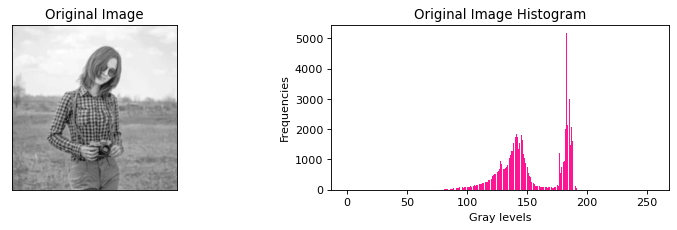

In [10]:
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(222), plt.bar(range(256), hist.ravel(), color='deeppink')
plt.title('Original Image Histogram')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')
plt.show()

Saya menyimpan nilai rows dan cols untuk memudahkan proses looping.

In [11]:
rows, cols = img.shape
rows, cols

(250, 250)

<b>I. Gray-level slicing tanpa latar belakang</b>
<br>
Saya menentukan nilai lower_threshold dan upper_threshold terlebih dahulu.

In [12]:
lower_threshold = 75
upper_threshold = 130

Saya membuat sebuah array yang bernama img_without_bg, dimana semua elemennya bernilai 0.

In [13]:
img_without_bg = np.zeros((rows,cols), dtype='uint8')

Saya melakukan looping dengan mengecek untuk setiap angka dalam array img:
<br>
<ul>
    <li>Jika angka tersebut <b>lebih besar</b> daripada ambang bawah threshold dan angka tersebut <b>lebih kecil</b> daripada ambang atas threshold, maka simpan 0 ke dalam array img_without_bg. Artinya, jadikan pixel ini berwarna <b>hitam</b>.</li>
    <li>Jika angka tersebut <b>tidak memenuhi</b> kondisi pertama, maka simpan 255 ke dalam array img_without_bg. Artinya, jadikan pixel ini berwarna <b>putih</b>.</li>
</ul>

In [14]:
for i in range(rows): 
    for j in range(cols):      
        if img[i,j] > lower_threshold and img[i,j] < upper_threshold: 
            img_without_bg[i,j] = 0
        else:
            img_without_bg[i,j] = 255

Saya melihat bahwa hanya ada 2 variasi angka, yakni 0 dan 255 dalam array img_without_bg.

In [15]:
img_without_bg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

Saya memperlihatkan perbandingan antara original image dan transformed image tanpa latar belakang. Pada original image, objek manusia dan padang rumput di belakangnya masih bercampur. Sedangkan, pada transformed image, padang rumput di belakang dihilangkan dengan cara diubah ke warna putih melalui pengecekan kondisi sebelumnya. Perubahan ini juga tampak pada histogram yang hanya terbagi menjadi 2 kelompok gray level value, yakni 0 dan 255.

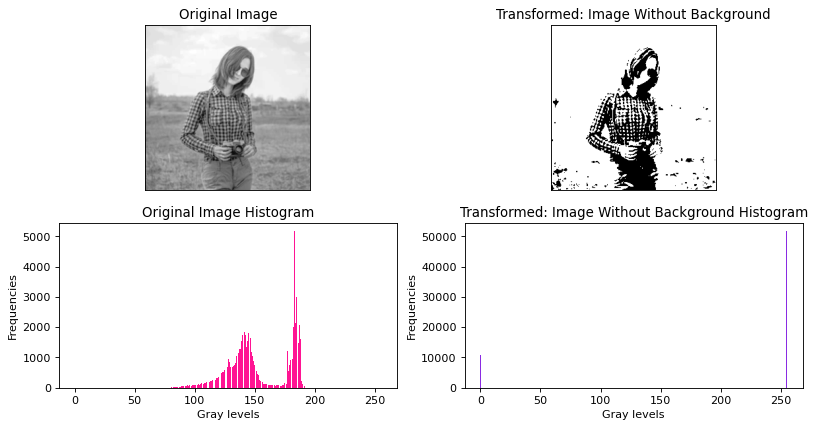

In [16]:
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(223), plt.bar(range(256), hist.ravel(), color='deeppink')
plt.title('Original Image Histogram')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')

plt.subplot(222), plt.imshow(img_without_bg, cmap='gray')
plt.title('Transformed: Image Without Background')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img_without_bg],[0],None,[256],[0,256])
plt.subplot(224), plt.bar(range(256), hist.ravel(), color='blueviolet')
plt.title('Transformed: Image Without Background Histogram')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')
plt.show()

<b>II. Gray-level slicing dengan latar belakang</b>
<br>
Saya menentukan nilai lower_threshold dan upper_threshold terlebih dahulu.

In [17]:
lower_threshold = 75
upper_threshold = 130

Saya membuat sebuah array yang bernama img_with_bg, dimana semua elemennya bernilai 0.

In [18]:
img_with_bg = np.zeros((rows,cols), dtype='uint8')

Saya melakukan looping dengan mengecek untuk setiap angka dalam array img:
<br>
<ul>
    <li>Jika angka tersebut <b>lebih besar</b> daripada ambang bawah threshold dan angka tersebut <b>lebih kecil</b> daripada ambang atas threshold, maka simpan 255 ke dalam array img_with_bg. Artinya, jadikan pixel ini berwarna <b>putih</b>.</li>
    <li>Jika angka tersebut <b>tidak memenuhi</b> kondisi pertama, maka simpan nilai gray level aslinya dalam array img_with_bg. Artinya, warna pixel ini <b>tidak berubah</b> dari warna sebelumnya.</li>
</ul>

In [19]:
for i in range(rows):      
    for j in range(cols):
        if img[i,j] > lower_threshold and img[i,j] < upper_threshold:
            img_with_bg[i,j] = 255
        else:
            img_with_bg[i,j] = img[i,j]

Saya melihat bahwa ada banyak variasi angka selain 255 dalam array img_with_bg.

In [20]:
img_with_bg

array([[172, 173, 173, ..., 185, 185, 185],
       [172, 173, 173, ..., 185, 185, 185],
       [172, 175, 175, ..., 185, 185, 185],
       ...,
       [255, 255, 255, ..., 138, 141, 141],
       [255, 255, 255, ..., 138, 141, 140],
       [255, 255, 255, ..., 138, 140, 140]], dtype=uint8)

Saya memperlihatkan perbandingan antara original image dan transformed image dengan latar belakang. Pada original image, objek manusia dan padang rumput di belakangnya masih bercampur. Sedangkan, pada transformed image, objek manusia dihilangkan dengan cara diubah ke warna putih melalui pengecekan kondisi sebelumnya. Perubahan ini juga tampak pada histogram yang ketika ditransformasi, tidak lagi memiliki nilai minimum 75, melainkan nilai minimum 130.

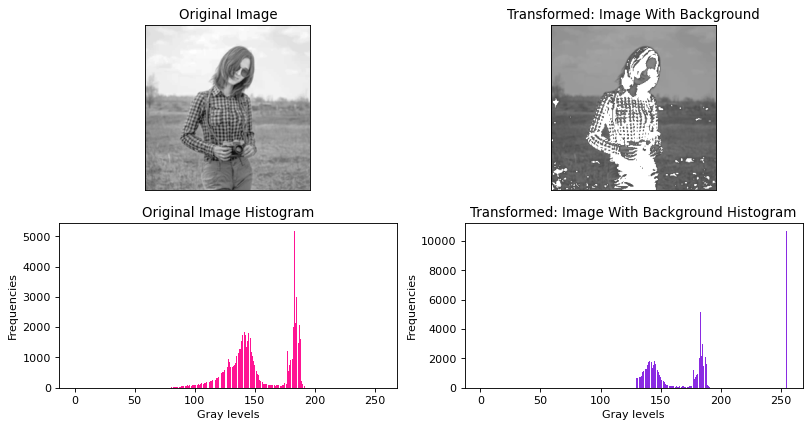

In [21]:
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(223), plt.bar(range(256), hist.ravel(), color='deeppink')
plt.title('Original Image Histogram')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')

plt.subplot(222), plt.imshow(img_with_bg, cmap='gray')
plt.title('Transformed: Image With Background')
plt.grid(False), plt.xticks([]), plt.yticks([])

hist = cv2.calcHist([img_with_bg],[0],None,[256],[0,256])
plt.subplot(224), plt.bar(range(256), hist.ravel(), color='blueviolet')
plt.title('Transformed: Image With Background Histogram')
plt.xlabel('Gray levels')
plt.ylabel('Frequencies')
plt.show()

## THANK YOU